OBJECTIVE:
--> Implement Stochastic Gradient Desent for Linear Regression.
--> Try to apply our implementation to find the prices of house in Boston dataset from sklearn
--> Use SGDregressor from SKlearn with squared loss and compare with our implementation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import cross_validation
import warnings
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import random
warnings.filterwarnings("ignore")
# =============================================================================================

c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Loading the Boston data set
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [3]:
bos = pd.DataFrame(boston.data)
print(bos.head())
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [4]:
#Converting the Data Frame to Numpy Array
X= X.values
Y=Y.values
type(X)
type(Y)

numpy.ndarray

In [5]:
print(X.shape)
Y.shape

(506, 13)


(506,)

In [119]:
def SGD_implemented(X,Y,W):
    iter_ = 1
    lr=.0001
    MSE = []
    itr = [1]
    while True:
        min_sq_error = np.sum((X.dot(W) - Y)**2)/Y.size
        MSE.append(min_sq_error)
        W_next = W - lr * X.T.dot(X.dot(W) - Y)/Y.size
        if( iter_ == 300000 or abs(W_next-W).all() < .0001):
            break
        else: 
            W=W_next
            iter_+=1
            itr.append(iter_)
    print(iter_)
    W_final = W
    plt.plot(itr,MSE)
    
    plt.title('Error vs Iter')
    plt.xlabel('No. of iterations')
    plt.ylabel('Error')
    
    return W_final     
    

Implementation:
Stack up a column of ones in X and use that to multiply with the intercept term in order to
simplify the calcualtion

277282
the weights term from our plane is:  [[-8.91288892e-01]
 [ 1.03055537e+00]
 [ 3.02790586e-03]
 [ 7.01982046e-01]
 [-2.01146529e+00]
 [ 2.70181589e+00]
 [-4.13999079e-03]
 [-3.09542871e+00]
 [ 2.30186446e+00]
 [-1.68031431e+00]
 [-2.04427449e+00]
 [ 8.55330961e-01]]
the intercept term from our plane is:  [22.53280632]


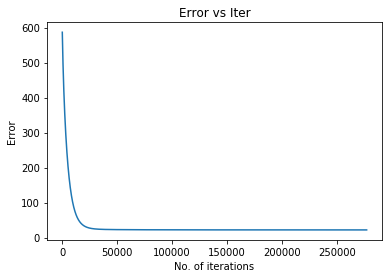

In [120]:
rows = Y.size

#standardising data as they are of different scales
X_sd = StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(X)    

#initiate ones in X vector, so that we can include the intercept in weight plane.
X_0 = np.ones(rows)
X_0 = X_0.reshape(rows,1)
X_fin = np.hstack((X_0,X_sd))

#As we have new columns of 1 total 14(including intercept)
W = np.random.rand(14,1)

Y = Y.reshape(-1,1)

opt_plane = SGD_implemented(X_fin,Y,W)

print("the weights term from our plane is: ",opt_plane[1:13])
print("the intercept term from our plane is: ",opt_plane[0])

The function exits loop at around 280000 iterations as there is not much change in the plane weights(<.0001).
We see that there is not much difference in the MSE after 25000 iterations.

R2 score  0.7403717022348367


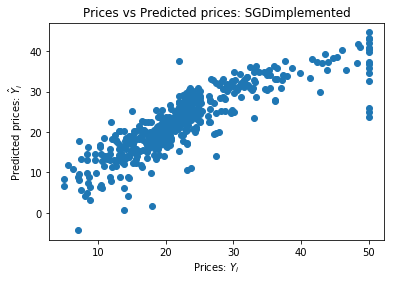

The MSE for sklearn sgd is:  1.596104210217807e-19


In [121]:
#predicting the values using our plane
Y_hat_implemented = X_fin.dot(opt_plane)

print('R^2 score ',metrics.r2_score(Y, Y_hat_implemented))
plt.scatter(Y,Y_hat_implemented)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: SGDimplemented")
plt.show()

min_sq_error = np.sum(Y_hat_implemented - Y)**2/Y.size
print('The MSE for implemented sgd is: ',min_sq_error)


Conclusion:
1) We get an R squared score of 74.03 % for our implementation
2)The MSE for implementation was 1.596.

SGD Regressor from SKLearn:
Predicting Y values from SGregressor sklearn using the same parameters as we used in our implementation

R2 score  0.7406074609517199


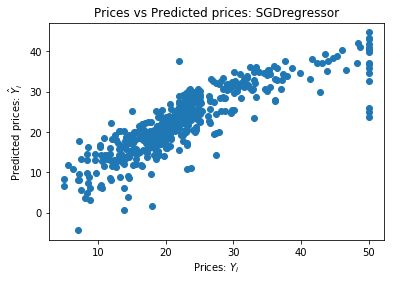

The MSE for sklearn sgd is:  30.46031667440524


In [122]:
from sklearn.linear_model import SGDRegressor

# using same parameters as in above implementation
rate = 0.0001

reg = SGDRegressor(loss="squared_loss", alpha= rate, max_iter = 300000)

#Training the Model
model_skReg = reg.fit(X_sd, Y)

# predicting 
Yhat_Sk_pred = reg.predict(X_sd)

print('R2 score ',model_skReg.score(X_sd, Y))

plt.scatter(Y,Yhat_Sk_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: SGDregressor")
plt.show()

min_sq_error = np.sum(Yhat_Sk_pred - Y)**2/Y.size
print('The MSE for sklearn sgd is: ',min_sq_error)


Conclusion:
1) We get an R squared score of 74.06 % for our implementation
2)The MSE for sklearn implementation is 30.46.

Text(0.5,1,'Weight vectors of implemented GD VS sklearn SGDregressor')

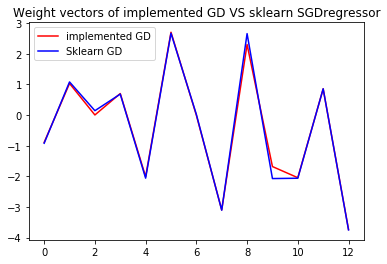

In [124]:
#plotting the plane weights from our implementation and SGD regressor of sklearn 

w1 = opt_plane[1:]
w2 = model_skReg.coef_

plt.plot(w1,'red',w2,'blue')
plt.legend(['implemented GD','Sklearn GD'])
plt.title("Weight vectors of implemented GD VS sklearn SGDregressor")

# FINAL CONCLUSION:
    
        
|LR method|R2 Score|
|---|---|
|sklearn SGDregressor |74.06|
|implemented SGDregressor|74.03|


    1)The SGD regressor was implemented from scratch. Same was used to find prices of house in Boston dataset
    2)The implementation was compared with that of SGDregressor from SKlearn.
    3)we see that our implementation has an R^2 score of 74.03 % while Sklearn regressor has an R^2 score of 74.06 %.
    4)As the parameters used in both were the same, our model performs almost same as Sklearn regressor.
    5) The values fo plane obtained from both the models were plotted which almost overlapped.
